STEP 1:IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn import svm
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix,classification_report


Step 2: Data Importing and Analysis

In [ ]:
data_df=pd.read_csv('/content/heartfailurepredn.csv')

In [ ]:
data_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           918 non-null    int64  
 1   RestingBP     918 non-null    int64  
 2   Cholesterol   918 non-null    int64  
 3   FastingBS     918 non-null    int64  
 4   MaxHR         918 non-null    int64  
 5   Oldpeak       918 non-null    float64
 6   HeartDisease  918 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 50.3 KB


<ipython-input-8-988cfd73f383>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=data_df['HeartDisease'],palette=cols)


[Text(0, 0, '410')]

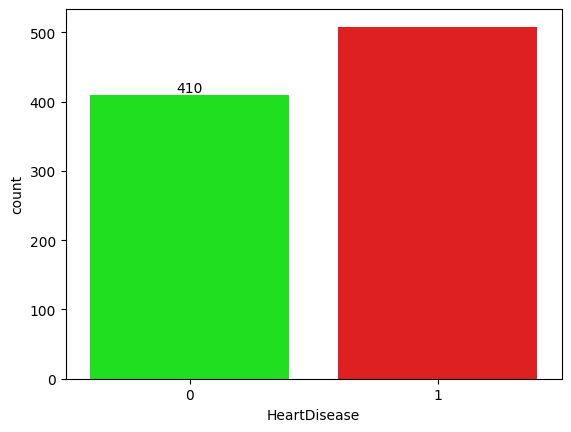

In [ ]:
cols=["#00ff00","#FF0000"]
ax=sns.countplot(x=data_df['HeartDisease'],palette=cols)
ax.bar_label(ax.containers[0])


In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


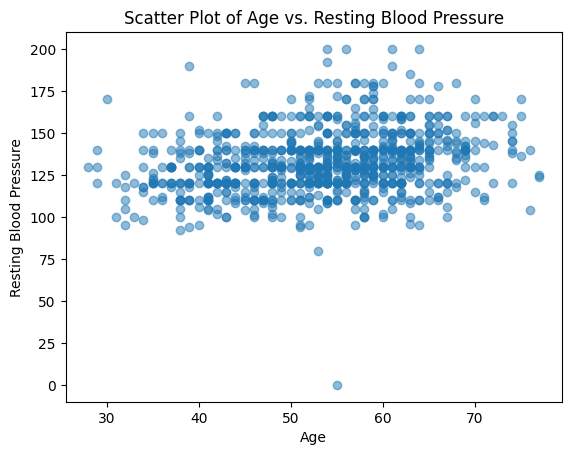

In [ ]:
plt.scatter(data_df['Age'], data_df['RestingBP'], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.title("Scatter Plot of Age vs. Resting Blood Pressure")
plt.show()


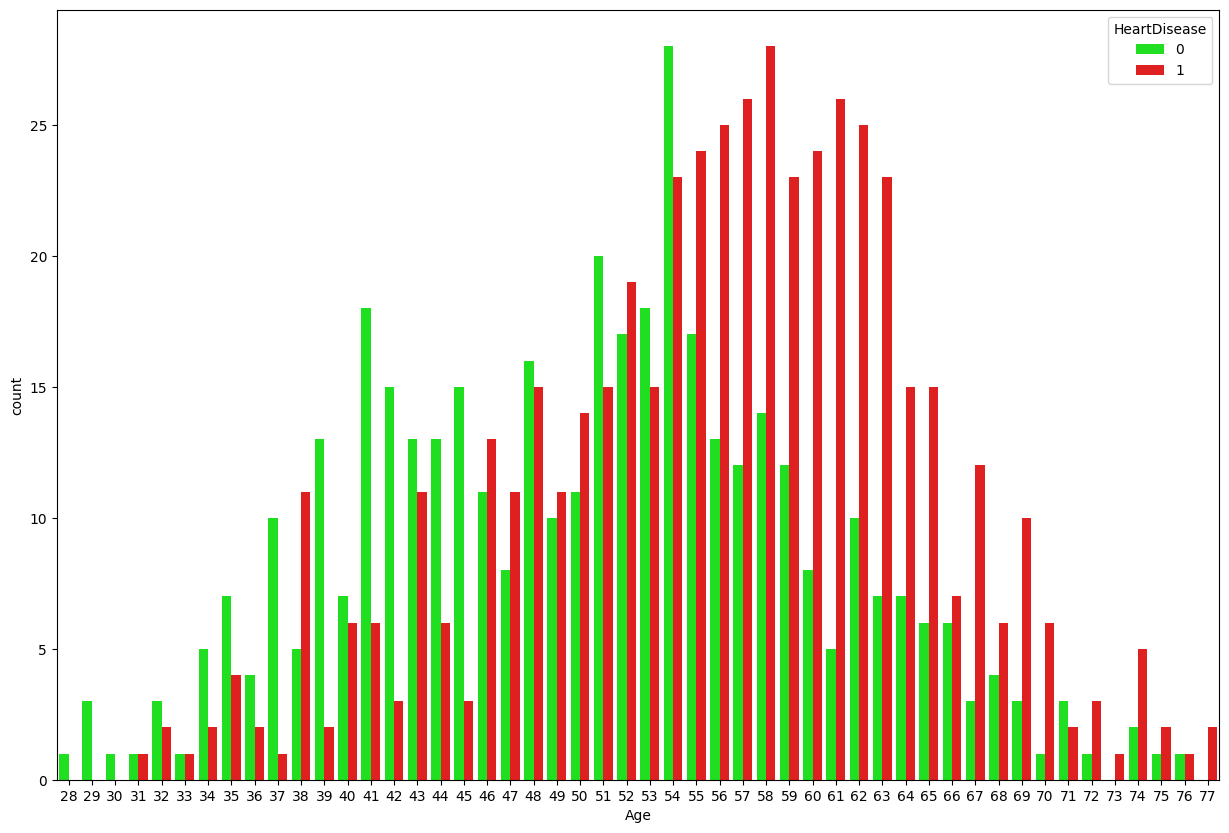

In [ ]:
plt.figure(figsize=(15,10))
age_heart_disease_plot = sns.countplot(x=data_df['Age'], data=data_df, hue="HeartDisease", palette=cols)

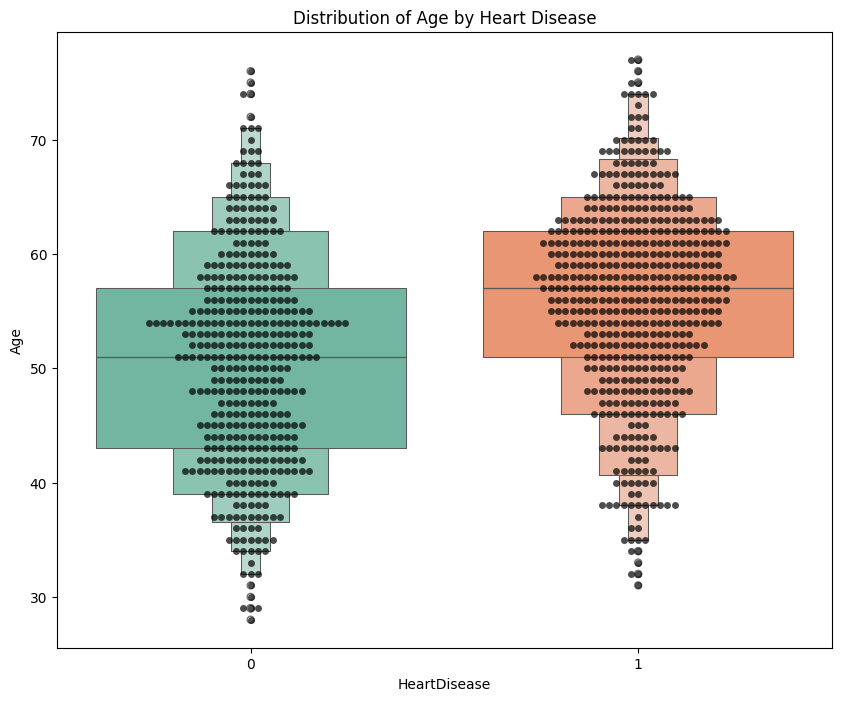

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


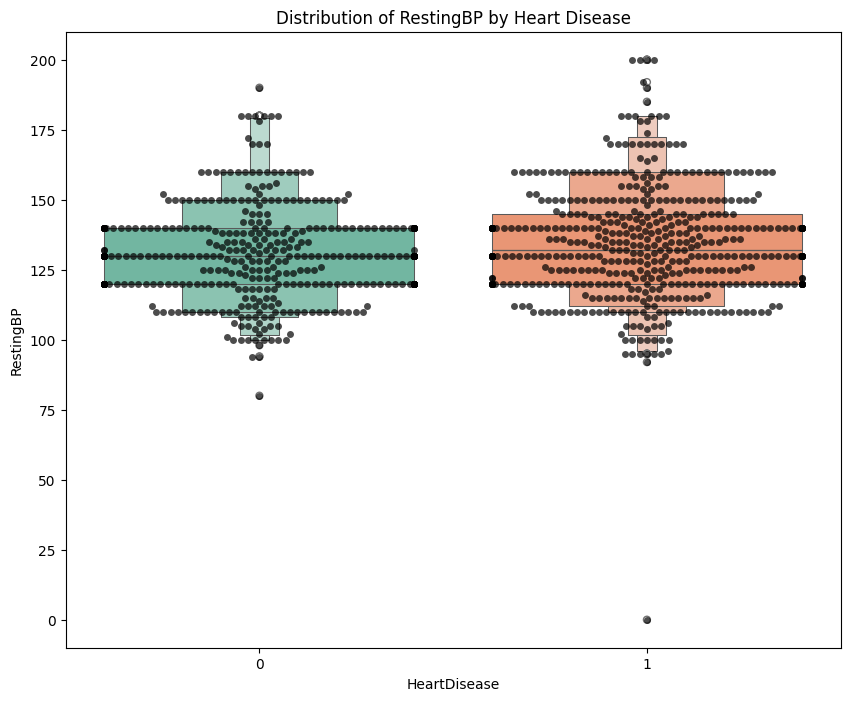

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


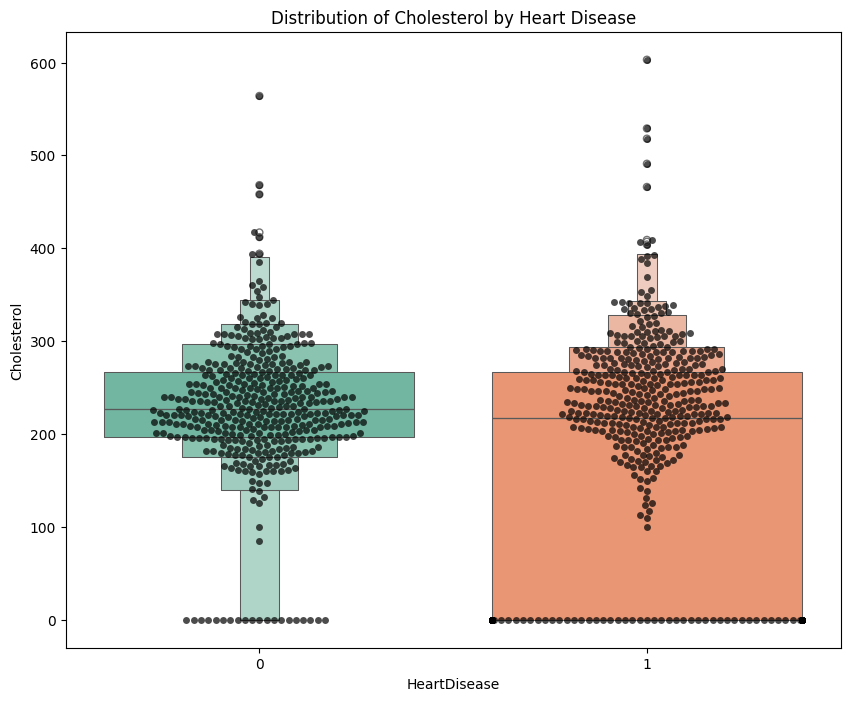

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 79.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 83.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


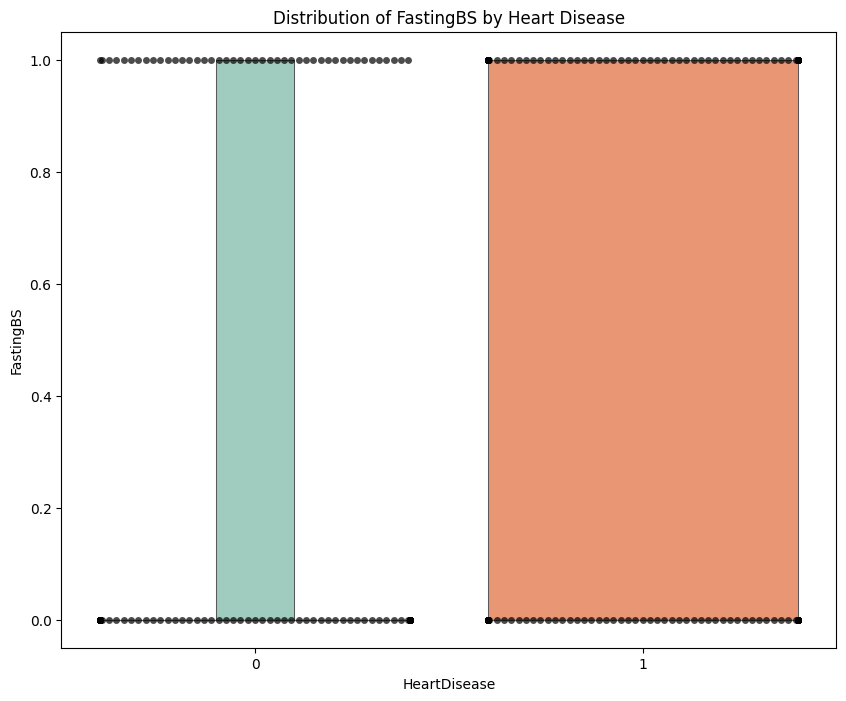

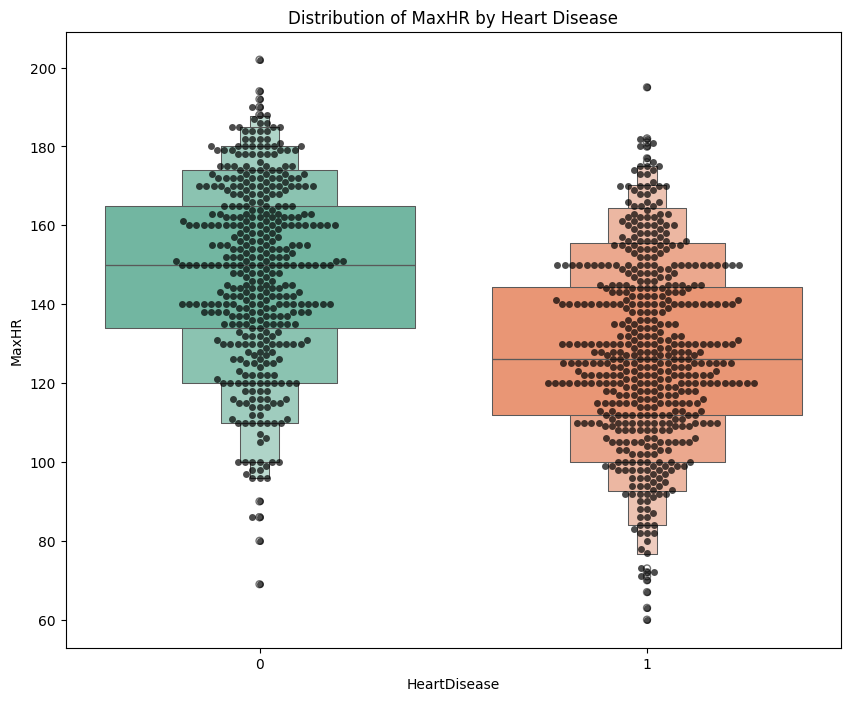

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 49.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


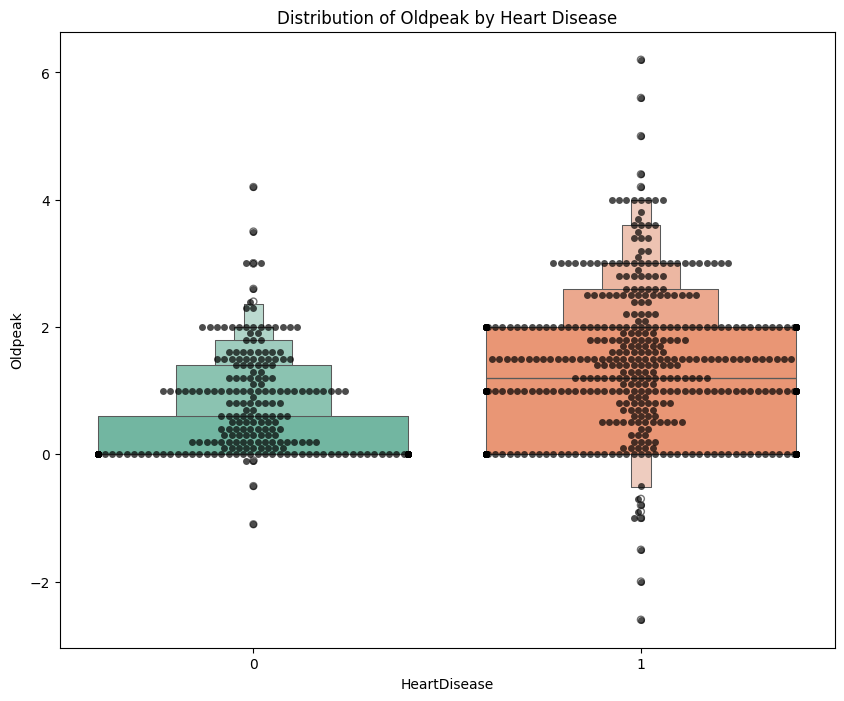

In [ ]:
feature = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]
cols = sns.color_palette("Set2", 2)
for i in feature:
    plt.figure(figsize=(10, 8))
    sns.boxenplot(x="HeartDisease", y=i, data=data_df, palette=cols, hue="HeartDisease", legend=False)
    sns.swarmplot(x="HeartDisease", y=i, data=data_df, color="black", alpha=0.7)
    plt.title(f"Distribution of {i} by Heart Disease")
    plt.show()


Data Preprocessing

In [ ]:
x=data_df.drop(columns='HeartDisease',axis=1)
y=data_df['HeartDisease']

In [ ]:
col_names=list(x.columns)
s_scaler=preprocessing.StandardScaler()
x_scaled=s_scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=col_names)


In [ ]:
x_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,-1.083616e-16,1.000545,-2.706015,-0.690629,0.051881,0.688318,2.491558
RestingBP,918.0,1.954380e-16,1.000545,-7.154995,-0.669935,-0.129513,0.410909,3.653439
Cholesterol,918.0,0.000000e+00,1.000545,-1.818435,-0.233704,0.221363,0.623835,3.697252
FastingBS,918.0,-3.096047e-17,1.000545,-0.551341,-0.551341,-0.551341,-0.551341,1.813758
MaxHR,918.0,4.953675e-16,1.000545,-3.018469,-0.660578,0.046790,0.754157,2.561874
Oldpeak,918.0,1.238419e-16,1.000545,-3.271482,-0.832432,-0.269575,0.574711,4.983762


<Axes: >

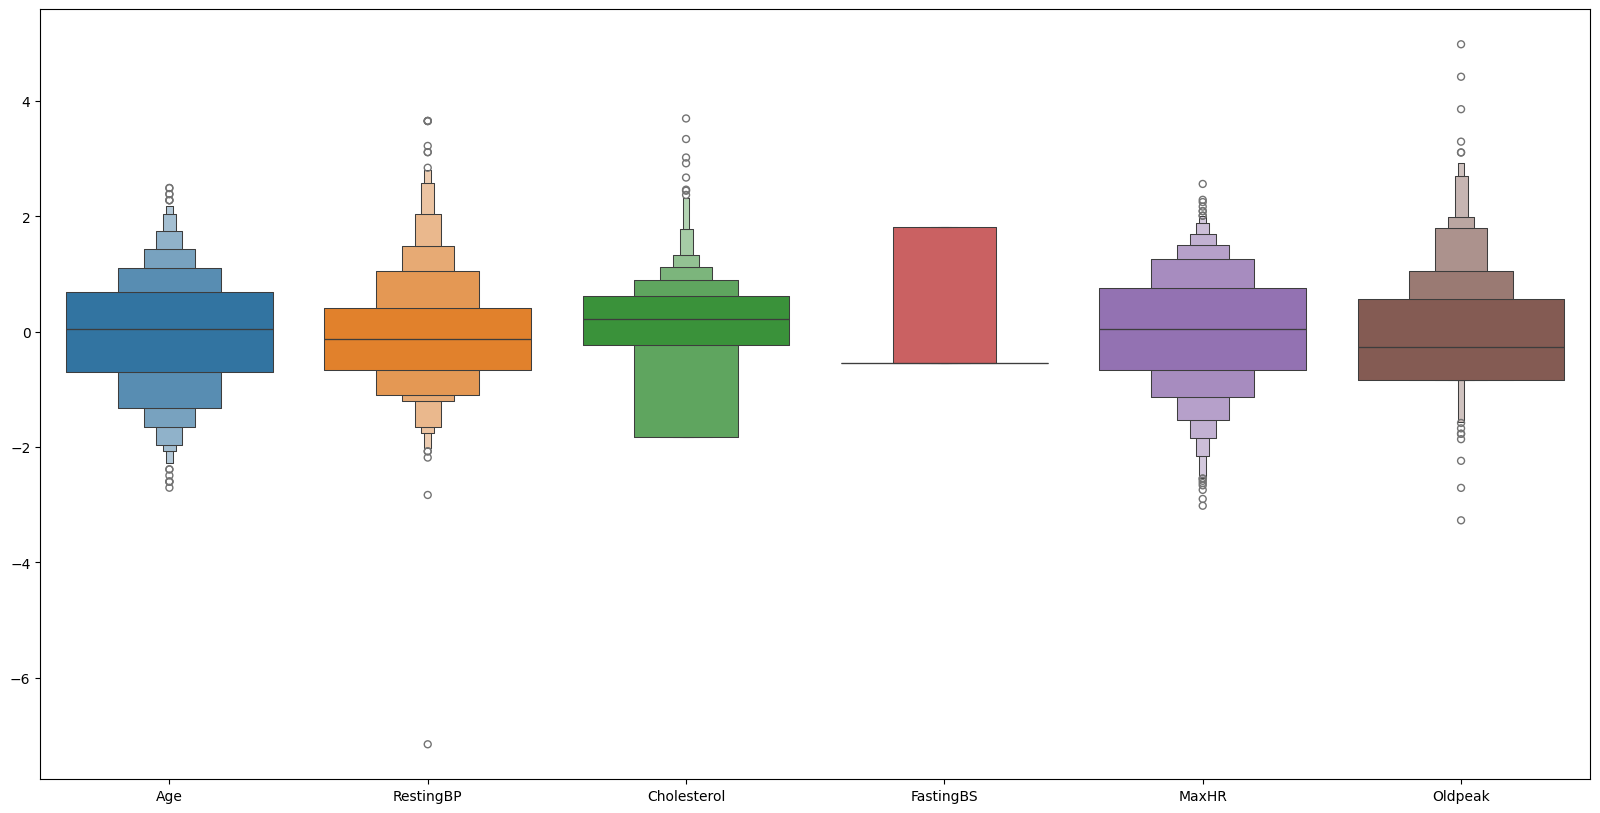

In [ ]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=x_scaled)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2)

1.svm

In [ ]:
model1=svm.SVC()
model1.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=model1.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1])

In [ ]:
y_train

,HeartDisease
85,1
397,1
848,1
491,1
721,0
...,...
127,0
751,0
64,0
577,1


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        88
           1       0.80      0.74      0.77        96

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184



ANN

In [ ]:
early_stopping=callbacks.EarlyStopping(min_delta=0.0,patience=20,restore_best_weights=True)
model=Sequential()
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=12))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8,kernel_initializer='uniform',activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentrophy',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215 (860.00 B)

 Trainable params: 215 (860.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(6,)))  # <-- changed from 12 to 6
model.add(Dense(1, activation='sigmoid'))  # or whatever output layer fits your task

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, batch_size=25, epochs=100,
                    callbacks=[early_stopping], validation_split=0.25)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8015 - loss: 0.4509 - val_accuracy: 0.7337 - val_loss: 0.5477
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8018 - loss: 0.4357 - val_accuracy: 0.7283 - val_loss: 0.5487
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7670 - loss: 0.4595 - val_accuracy: 0.7283 - val_loss: 0.5522
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7732 - loss: 0.4552 - val_accuracy: 0.7337 - val_loss: 0.5527
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7890 - loss: 0.4481 - val_accuracy: 0.7337 - val_loss: 0.5561
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7703 - loss: 0.4800 - val_accuracy: 0.7391 - val_loss: 0.5581
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8026 - loss: 0.4388 - val_accuracy: 0.7391 - val_loss: 0.5576
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7707 - loss: 0.4659 - val_accuracy: 0.7446 - v

In [ ]:
y_pred=model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
y_pred=(y_pred>0.5)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        88
           1       0.76      0.81      0.78        96

    accuracy                           0.77       184
   macro avg       0.77      0.76      0.76       184
weighted avg       0.77      0.77      0.77       184

